In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
df2023 = pd.read_csv('/Users/daynakarls/Library/CloudStorage/OneDrive-UW-Madison/Biokind Analytics/2023 Annual Campaign - Active.csv')
df2023.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/daynakarls/Library/CloudStorage/OneDrive-UW-Madison/Biokind Analytics/2023 Annual Campaign - Active.csv'

In [ ]:
df2022 = pd.read_csv('/Users/daynakarls/Library/CloudStorage/OneDrive-UW-Madison/Biokind Analytics/2022 Annual Campaign - Active.csv')
df2022.head()

,Donation ID,Account ID,Shopping Cart ID,Campaign ID,Donation Amount,Donation Date,Account Type,Full Name (F),Company Name,City,Address Line 1,State/Province,Zip Code,Campaign Name,Purpose,Fund,Tender Type,Tribute Full Name (F),Unnamed: 18
0,3701,3342,3753,9,103.30,02/24/2022,Individual,John Anderson,NaN,Wisconsin Dells,879 South Grouse Ct,WI,53965,2022 Annual Campaign,NaN,Unrestricted,Credit Card (Online),NaN,NaN
1,4662,4221,4714,9,51.80,05/15/2022,Individual,Taylor Andrews,NaN,NaN,NaN,NaN,53593,2022 Annual Campaign,NaN,Unrestricted,Credit Card (Online),NaN,NaN
2,3479,3120,3531,9,25.00,02/24/2022,Individual,Valerie Ash,NaN,Rio,135 Athens St,WI,53960,2022 Annual Campaign,NaN,Unrestricted,PayPal,NaN,NaN
3,6571,2296,6623,9,52.39,02/25/2023,Individual,Dennis & Denise Babish,NaN,NaN,NaN,NaN,53536,2022 Annual Campaign,General Operating,Unrestricted,Credit Card (Online),NaN,NaN
4,6955,2296,7018,9,52.50,11/25/2023,Individual,Dennis & Denise Babish,NaN,NaN,NaN,NaN,53536,2022 Annual Campaign,General Operating,Unrestricted,Credit Card (Online),NaN,NaN


In [ ]:
df2023['City'] = (
    df2023['City']
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
    .str.strip()
)

#condensing city names, so that all of the same can be grouped together 
city_replacements = {
    'madison wi 53705 usa': 'madison',
    'madison wi': 'madison',
    'madison': 'madison',
    'verona wi': 'verona',
    'prairie du sac': 'prairie du sac',
    'waterloo wi': 'waterloo',
    'oregon wi': 'oregon',
    'cambria wi': 'cambria',
}
df2023['City'] = df2023['City'].replace(city_replacements)

#changed 'NA' rows to unknown
df2023['City'] = df2023['City'].fillna('unknown')
df2023['State/Province'] = df2023['State/Province'].fillna('unknown')

#some rows had city = madison, state = unknown, changed the state of these rows to WI, so they could be grouped with the rest of the madison rows
df2023.loc[(df2023['City'] == 'madison') & (df2023['State/Province'] == 'unknown'), 'State/Province'] = 'WI'



#grouped rows by city and state and to get total donation amount
summary_df23 = df2023.groupby(['City', 'State/Province']).agg(
    Number_of_Donors=('City', 'size'),
    Total_Donation_Amount=('Donation Amount', 'sum')
).reset_index()

summary_df23

,City,State/Province,Number_of_Donors,Total_Donation_Amount
0,belleville,WI,1,103.60
1,brooklyn,WI,1,90.00
2,cambria,WI,1,51.85
3,cambridge,WI,7,318.32
4,cross plains,WI,1,12.68
5,deerfield,WI,1,154.93
6,deforest,WI,2,801.85
7,eau claire,WI,1,51.96
8,edgerton,WI,1,129.16
9,evansville,WI,3,177.16


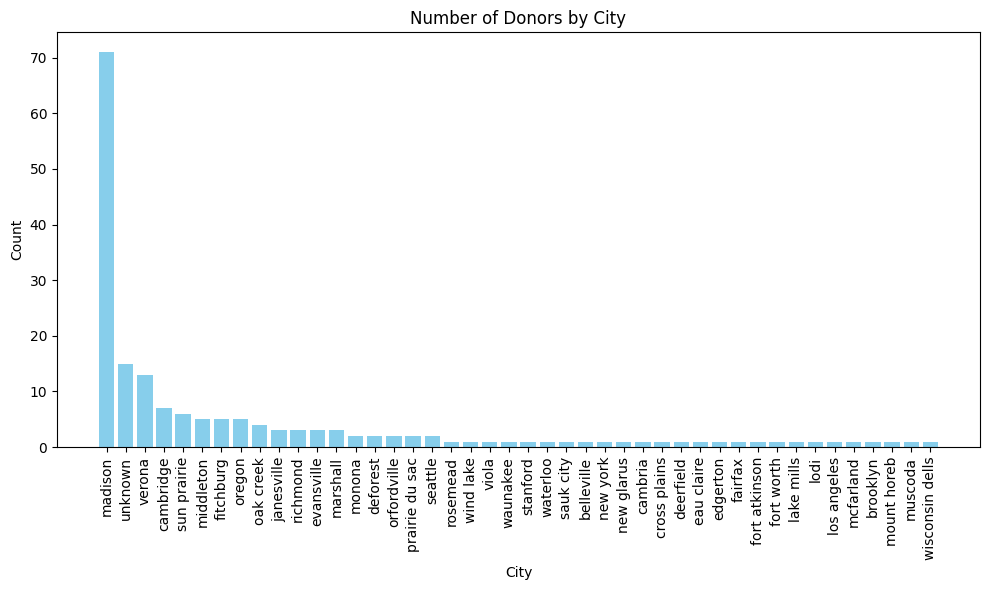

In [ ]:
summary_df23_sorted_by_donor = summary_df23.sort_values(by='Number_of_Donors', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(summary_df23_sorted_by_donor['City'], summary_df23_sorted_by_donor['Number_of_Donors'], color='skyblue')
plt.xticks(rotation=90)  
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Number of Donors by City in 2023')
plt.tight_layout() 

plt.show() #ranking cities by number of donors 

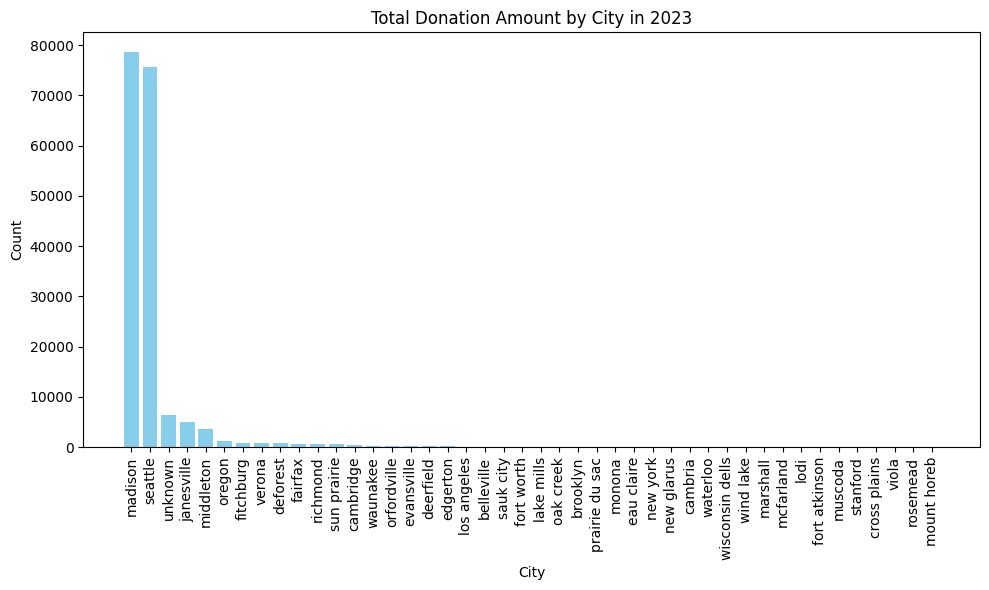

In [ ]:
summary_df23_sorted_by_donation = summary_df23.sort_values(by='Total_Donation_Amount', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(summary_df23_sorted_by_donation['City'], summary_df23_sorted_by_donation['Total_Donation_Amount'], color='skyblue')
plt.xticks(rotation=90)  
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Total Donation Amount by City in 2023')
plt.tight_layout() 

plt.show() #ranking cities by donation amount

In [ ]:
df2022['City'] = (
    df2022['City']
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
    .str.strip()
)

#condensing city names, so that all of the same can be grouped together 
city_replacements = {
    'madison wi 53705 usa': 'madison',
    'madison wi': 'madison',
    'madison': 'madison',
    'verona wi': 'verona',
    'prairie du sac': 'prairie du sac',
    'waterloo wi': 'waterloo',
    'oregon wi': 'oregon',
    'cambria wi': 'cambria',
    'waukesha wisconsin ee uu' : 'waukesha',
}
df2022['City'] = df2022['City'].replace(city_replacements)

#changed 'NA' rows to unknown
df2022['City'] = df2022['City'].fillna('unknown')
df2022['State/Province'] = df2022['State/Province'].fillna('unknown')

#some rows had city = madison, state = unknown, changed the state of these rows to WI, so they could be grouped
df2022.loc[(df2022['City'] == 'madison') & (df2022['State/Province'] == 'unknown'), 'State/Province'] = 'WI'


#grouped rows by city and state and to get total donation amount
summary_df22 = df2022.groupby(['City', 'State/Province']).agg(
    Number_of_Donors=('City', 'size'),
    Total_Donation_Amount=('Donation Amount', 'sum')
).reset_index()

summary_df22

,City,State/Province,Number_of_Donors,Total_Donation_Amount
0,albany,WI,1,26.06
1,arena,WI,1,26.06
2,austin,TX,1,51.80
3,belleville,WI,1,26.06
4,cambridge,WI,6,1408.49
5,cortlandt manor,NY,1,25.00
6,cottage grove,WI,2,129.45
7,cross plains,WI,2,24.67
8,darlington,WI,1,26.06
9,deforest,WI,20,847.16


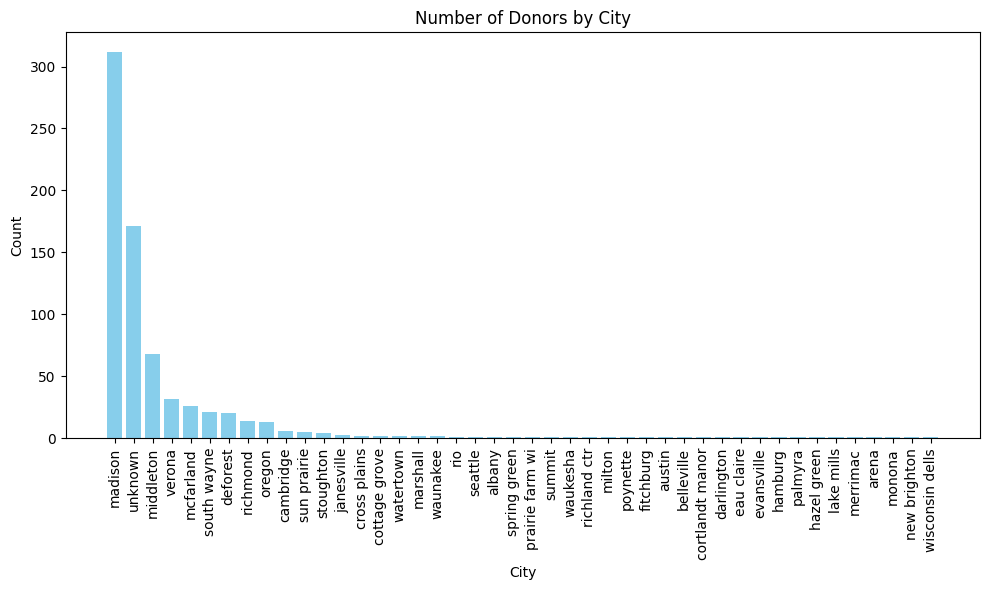

In [ ]:
summary_df22_sorted_by_donor = summary_df22.sort_values(by='Number_of_Donors', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(summary_df22_sorted_by_donor['City'], summary_df22_sorted_by_donor['Number_of_Donors'], color='skyblue')
plt.xticks(rotation=90)  
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Number of Donors by Cityin 2022')
plt.tight_layout() 

plt.show() #ranking cities by number of donors 

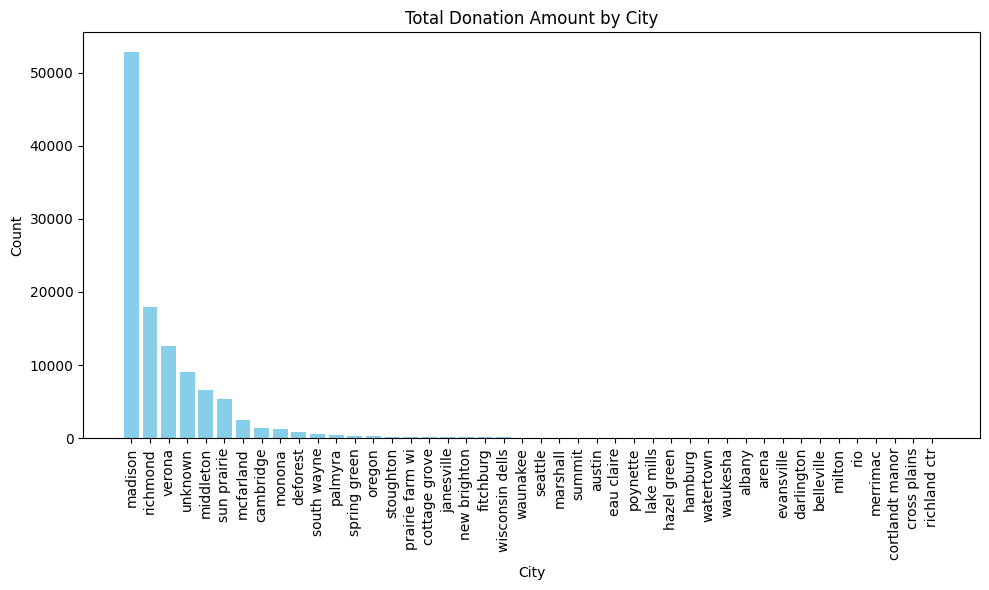

In [ ]:
summary_df22_sorted_by_donation = summary_df22.sort_values(by='Total_Donation_Amount', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(summary_df22_sorted_by_donation['City'], summary_df22_sorted_by_donation['Total_Donation_Amount'], color='skyblue')
plt.xticks(rotation=90)  
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Total Donation Amount by City in 2022')
plt.tight_layout() 

plt.show() #ranking cities by donation amount

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

# Filter for donations
data = df2022.dropna(subset=['City', 'Donation Amount'])  # Drop rows with missing data

# Aggregate donations by city
aggregated_donations = data.groupby('City')['Donation Amount'].sum().reset_index()

# Initialize geolocator
geolocator = Nominatim(user_agent="donation_heatmap")

# Geocode function to get latitude and longitude for each city
def geocode_city(city, retries=3):
    for attempt in range(retries):
        try:
            location = geolocator.geocode(f"{city}, USA", timeout=10)  # Increase timeout
            if location:
                return location.latitude, location.longitude
            else:
                return None, None
        except GeocoderTimedOut:
            if attempt < retries - 1:
                time.sleep(2)  # Wait before retrying
                continue
            return None, None

# Add latitude and longitude columns
aggregated_donations[['Latitude', 'Longitude']] = aggregated_donations['City'].apply(
    lambda city: pd.Series(geocode_city(city))
)

# Drop rows where geocoding failed
aggregated_donations = aggregated_donations.dropna(subset=['Latitude', 'Longitude'])

# Create the base map
base_map2022 = folium.Map(location=[39.8283, -98.5795], zoom_start=5)

# Prepare data for the heat map (latitude, longitude, donation amount)
heat_data = aggregated_donations[['Latitude', 'Longitude', 'Donation Amount']].values.tolist()

# Add the heat map to the base map
HeatMap(heat_data, radius=15).add_to(base_map2022)

# Save and display the map
base_map2022.save("donations_heatmap.html")
base_map2022
#this is the heat map from the 2022 donations dataset

In [ ]:
# Filter for donations
data2 = df2023.dropna(subset=['City', 'Donation Amount'])  # Drop rows with missing data

# Aggregate donations by city
aggregated_donations2 = data2.groupby('City')['Donation Amount'].sum().reset_index()

# Initialize geolocator
geolocator = Nominatim(user_agent="donation_heatmap")

# Geocode function to get latitude and longitude for each city
def geocode_city(city, retries=3):
    for attempt in range(retries):
        try:
            location = geolocator.geocode(f"{city}, USA", timeout=10)  # Increase timeout
            if location:
                return location.latitude, location.longitude
            else:
                return None, None
        except GeocoderTimedOut:
            if attempt < retries - 1:
                time.sleep(2)  # Wait before retrying
                continue
            return None, None

# Add latitude and longitude columns to the aggregated donations DataFrame
aggregated_donations2[['Latitude', 'Longitude']] = aggregated_donations2['City'].apply(
    lambda city: pd.Series(geocode_city(city))
)

# Drop rows where geocoding failed
aggregated_donations2 = aggregated_donations2.dropna(subset=['Latitude', 'Longitude'])

# Create the base map
base_map2023 = folium.Map(location=[39.8283, -98.5795], zoom_start=5)

# Prepare data for the heat map (latitude, longitude, donation amount)
heat_data2 = aggregated_donations2[['Latitude', 'Longitude', 'Donation Amount']].values.tolist()

# Add the heat map to the base map
HeatMap(heat_data2, radius=15).add_to(base_map2023)

# Save and display the map
base_map2023.save("donations_heatmap_2023.html")
base_map2023